In [1]:
#import libraries
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

# for all NLP related operations on text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

ModuleNotFoundError: No module named 'spacy'

In [2]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [3]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [5]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [6]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

C:\Users\user\AppData\Local\Temp\ipykernel_15092\965255522.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(1,1000)):


  0%|          | 0/999 [00:00<?, ?it/s]

In [9]:
# Save results to a dataframe, then export as CSV
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7 December 2023
1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,8 December 2023
2,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,25 November 2023
3,4.0,4.0 out of 5 stars\nNice phone,Under 20k nice phoneCamera not up to the markB...,7 December 2023
4,4.0,4.0 out of 5 stars\nCe2 lite,Good,5 December 2023
5,4.0,4.0 out of 5 stars\nNice work,Good mobile,6 December 2023
6,4.0,4.0 out of 5 stars\nNice one,But hangs a bit,7 December 2023
7,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023
8,4.0,4.0 out of 5 stars\nValue for money,Camera is good but not in nightBattery is not ...,23 November 2023
9,4.0,4.0 out of 5 stars\nValue for money,Value for money,29 November 2023


In [11]:
#data exploration
df.Rating.describe()

count    10.0
mean      4.0
std       0.0
min       4.0
25%       4.0
50%       4.0
75%       4.0
max       4.0
Name: Rating, dtype: float64

In [13]:
#word count
df['word_count'] = df['Review'].apply(lambda x: len(str(x).split(" ")))
df[['Review','word_count']].head()

,Review,word_count
0,"Very nice phone 📱, i like it",7
1,Good Product Tq... One plus,5
2,It was really awesome and good in terms of cha...,30
3,Under 20k nice phoneCamera not up to the markB...,16
4,Good,1


In [14]:
#no of characters
df['char_count'] = df['Review'].str.len() ## this also includes spaces
df[['Review','char_count']].head()

,Review,char_count
0,"Very nice phone 📱, i like it",28
1,Good Product Tq... One plus,27
2,It was really awesome and good in terms of cha...,160
3,Under 20k nice phoneCamera not up to the markB...,84
4,Good,4


In [15]:
#avg word lenght
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Review'].apply(lambda x: avg_word(x))
df[['Review','avg_word']].head()

,Review,avg_word
0,"Very nice phone 📱, i like it",3.142857
1,Good Product Tq... One plus,4.600000
2,It was really awesome and good in terms of cha...,4.366667
3,Under 20k nice phoneCamera not up to the markB...,4.312500
4,Good,4.000000


In [16]:
#no of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df[['Review','stopwords']].head()

,Review,stopwords
0,"Very nice phone 📱, i like it",2
1,Good Product Tq... One plus,0
2,It was really awesome and good in terms of cha...,16
3,Under 20k nice phoneCamera not up to the markB...,7
4,Good,0


In [17]:
#no of special characterisitcs
df['hashtags'] = df['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
df[['Review','hashtags']].head()

,Review,hashtags
0,"Very nice phone 📱, i like it",0
1,Good Product Tq... One plus,0
2,It was really awesome and good in terms of cha...,0
3,Under 20k nice phoneCamera not up to the markB...,0
4,Good,0


In [18]:
# no of numerics
df['numerics'] = df['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
df[['Review','numerics']].head()

,Review,numerics
0,"Very nice phone 📱, i like it",0
1,Good Product Tq... One plus,0
2,It was really awesome and good in terms of cha...,0
3,Under 20k nice phoneCamera not up to the markB...,0
4,Good,0


In [19]:
# no of upper case words
df['upper'] = df['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
df[['Review','upper']].head()

,Review,upper
0,"Very nice phone 📱, i like it",0
1,Good Product Tq... One plus,0
2,It was really awesome and good in terms of cha...,0
3,Under 20k nice phoneCamera not up to the markB...,0
4,Good,0


In [23]:
pip install -U textblob


     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
     - ------------------------------------- 30.7/636.8 kB 1.3 MB/s eta 0:00:01
     ----- --------------------------------- 92.2/636.8 kB 1.1 MB/s eta 0:00:01
     --------- ---------------------------- 163.8/636.8 kB 1.2 MB/s eta 0:00:01
     ---------- --------------------------- 174.1/636.8 kB 1.1 MB/s eta 0:00:01
     ---------------- --------------------- 276.5/636.8 kB 1.2 MB/s eta 0:00:01
     ------------------ ------------------- 307.2/636.8 kB 1.2 MB/s eta 0:00:01
     ----------------------- -------------- 389.1/636.8 kB 1.3 MB/s eta 0:00:01
     ------------------------ ------------- 409.6/636.8 kB 1.2 MB/s eta 0:00:01
     ------------------------- ------------ 419.8/636.8 kB 1.1 MB/s eta 0:00:01
     -------------------------- ----------- 440.3/636.8 kB 1.0 MB/s eta 0:00:01
     -------------------------- --------- 471.0/636.8 kB 921.6 kB/s eta 0:00:01
     ---------------------------- ------- 501.

In [25]:
from textblob import TextBlob
df['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                         Very nice phone 📱, i like it
1                           Good Product Q... One plus
2    It was really awesome and good in terms of cha...
3    Under ask nice phoneCamera not up to the marke...
4                                                 Good
Name: Review, dtype: object

In [26]:
#Feature engineering
print(df['Review_Date'].str.split(' ').str[0],'\n',
      df['Review_Date'].str.split(' ').str[1],'\n',
      df['Review_Date'].str.split(' ').str[2])

0     7
1     8
2    25
3     7
4     5
5     6
6     7
7     1
8    23
9    29
Name: Review_Date, dtype: object 
 0    December
1    December
2    November
3    December
4    December
5    December
6    December
7     October
8    November
9    November
Name: Review_Date, dtype: object 
 0    2023
1    2023
2    2023
3    2023
4    2023
5    2023
6    2023
7    2023
8    2023
9    2023
Name: Review_Date, dtype: object


In [27]:
#splitting review date month 
df=df.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,7,December,2023
1,8,December,2023
2,25,November,2023
3,7,December,2023
4,5,December,2023
5,6,December,2023
6,7,December,2023
7,1,October,2023
8,23,November,2023
9,29,November,2023


In [28]:
df.Month.value_counts()

December    6
November    3
October     1
Name: Month, dtype: int64

In [29]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,December
1,December
2,November
3,December
4,December
5,December
6,December
7,October
8,November
9,November


In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
 4   word_count   10 non-null     int64  
 5   char_count   10 non-null     int64  
 6   avg_word     10 non-null     float64
 7   stopwords    10 non-null     int64  
 8   hashtags     10 non-null     int64  
 9   numerics     10 non-null     int64  
 10  upper        10 non-null     int64  
 11  Date         10 non-null     object 
 12  Month        10 non-null     object 
 13  Year         10 non-null     object 
dtypes: float64(2), int64(6), object(6)
memory usage: 1.2+ KB


In [31]:
df1[['Date','Year']]=df1[['Date','Year']].astype('int64')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10 non-null     float64
 1   Title        10 non-null     object 
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
 4   word_count   10 non-null     int64  
 5   char_count   10 non-null     int64  
 6   avg_word     10 non-null     float64
 7   stopwords    10 non-null     int64  
 8   hashtags     10 non-null     int64  
 9   numerics     10 non-null     int64  
 10  upper        10 non-null     int64  
 11  Date         10 non-null     int64  
 12  Month        10 non-null     object 
 13  Year         10 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 1.2+ KB


In [32]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7,28,3.142857,2,0,0,0,7,December,2023
1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,5,27,4.600000,0,0,0,0,8,December,2023
2,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,30,160,4.366667,16,0,0,0,25,November,2023
3,4.0,4.0 out of 5 stars\nNice phone,Under 20k nice phoneCamera not up to the markB...,16,84,4.312500,7,0,0,0,7,December,2023
4,4.0,4.0 out of 5 stars\nCe2 lite,Good,1,4,4.000000,0,0,0,0,5,December,2023


In [33]:
df

,Rating,Title,Review,Review_Date,word_count,char_count,avg_word,stopwords,hashtags,numerics,upper,Date,Month,Year
0,4.0,4.0 out of 5 stars\nReview on same mobile,"Very nice phone 📱, i like it",7 December 2023,7,28,3.142857,2,0,0,0,7,December,2023
1,4.0,4.0 out of 5 stars\nProduct,Good Product Tq... One plus,8 December 2023,5,27,4.600000,0,0,0,0,8,December,2023
2,4.0,"4.0 out of 5 stars\nDurability, Charging and s...",It was really awesome and good in terms of cha...,25 November 2023,30,160,4.366667,16,0,0,0,25,November,2023
3,4.0,4.0 out of 5 stars\nNice phone,Under 20k nice phoneCamera not up to the markB...,7 December 2023,16,84,4.312500,7,0,0,0,7,December,2023
4,4.0,4.0 out of 5 stars\nCe2 lite,Good,5 December 2023,1,4,4.000000,0,0,0,0,5,December,2023
5,4.0,4.0 out of 5 stars\nNice work,Good mobile,6 December 2023,2,11,5.000000,0,0,0,0,6,December,2023
6,4.0,4.0 out of 5 stars\nNice one,But hangs a bit,7 December 2023,4,15,3.000000,1,0,0,0,7,December,2023
7,4.0,4.0 out of 5 stars\nVery good phone in 16 K of...,Very good and Stylish phone as compared to oth...,1 October 2023,194,1003,4.175258,81,0,7,10,1,October,2023
8,4.0,4.0 out of 5 stars\nValue for money,Camera is good but not in nightBattery is not ...,23 November 2023,16,94,4.937500,8,0,0,0,23,November,2023
9,4.0,4.0 out of 5 stars\nValue for money,Value for money,29 November 2023,3,15,4.333333,1,0,0,0,29,November,2023


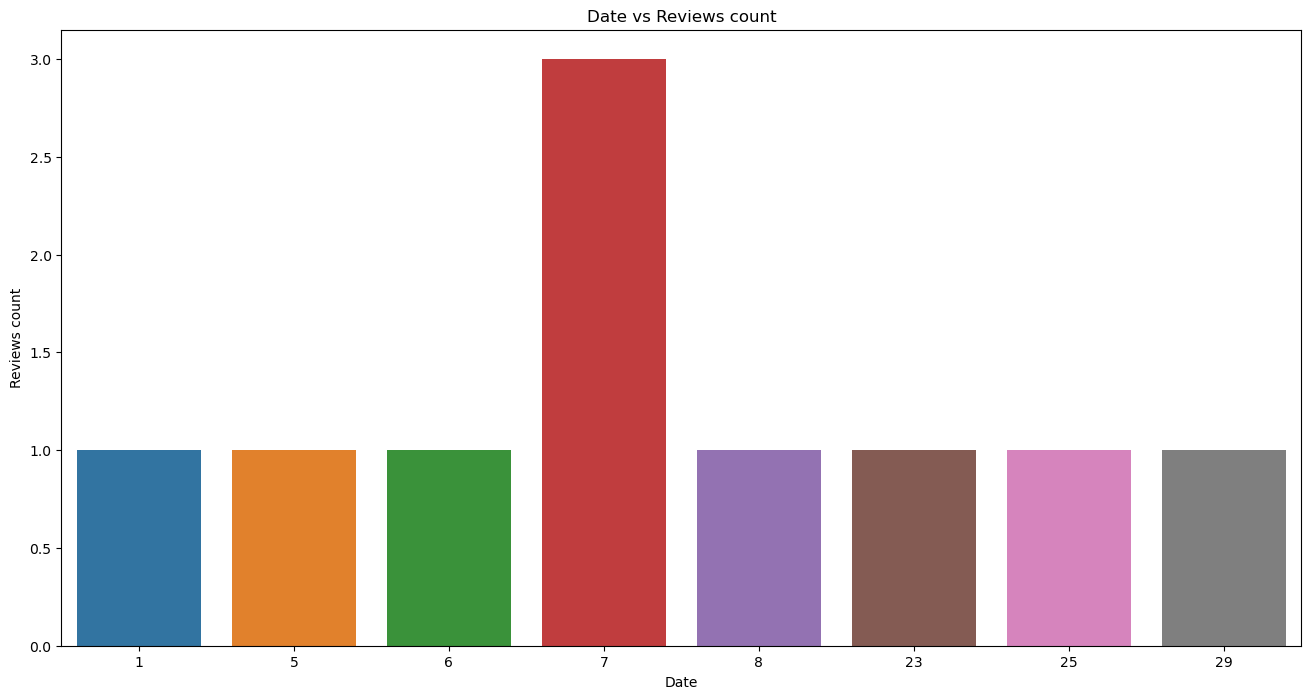

In [36]:
#Data visualization
#Creating a dataframe
dayreview = pd.DataFrame(df.groupby('Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Date'].astype('int64')
dayreview.sort_values(by = ['Date'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews count')
plt.xlabel('Date')
plt.ylabel('Reviews count')
plt.show()


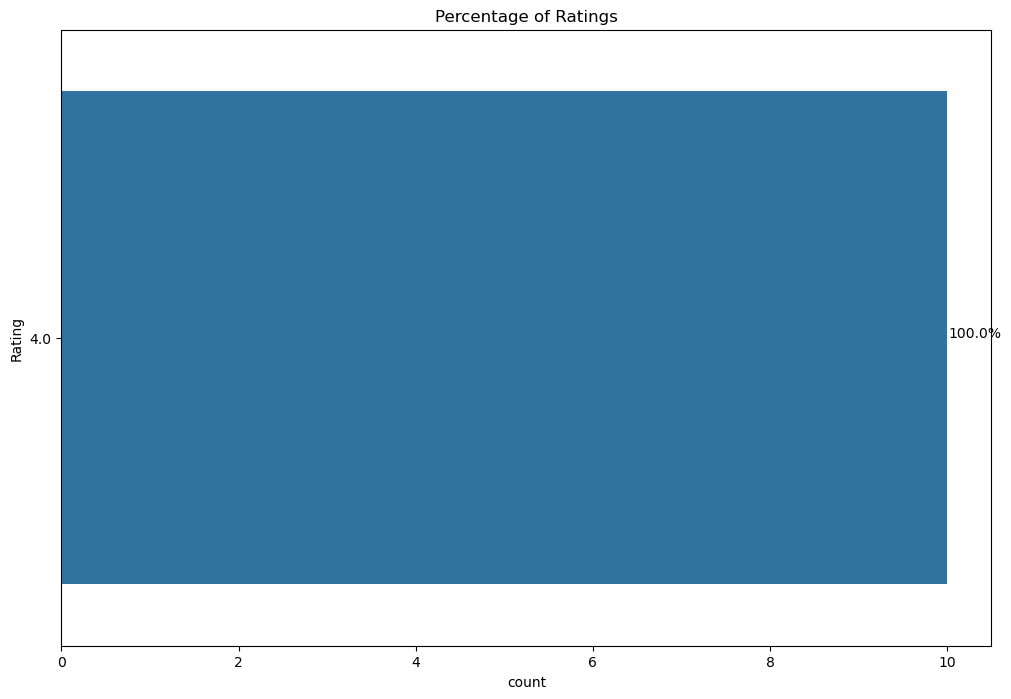

In [38]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = df)
total = len(df)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))